In [21]:
import geopandas as gpd
import pandas as pd

Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

In [12]:
pasig_gdf = gpd.read_file('data/json/pasig/pasig671.geojson')
pasig_gdf

,id,is_pano,thumb_2048_url,geometry
0,3159429050961771,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07829 14.54644)
1,662891988439287,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07855 14.54719)
2,3039984972998798,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07845 14.54718)
3,140754551805017,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07854 14.54763)
4,290101873268950,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07833 14.54686)
...,...,...,...,...
349,1253780695029939,False,NaN,POINT (121.07831 14.54665)
350,404618538166156,False,NaN,POINT (121.07832 14.54672)
351,526113149031527,False,NaN,POINT (121.07857 14.54760)
352,1240633726468693,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07830 14.54655)


In [26]:
df = pd.read_csv('data/csv/pasig_saved_coordinates.csv')
df

,X,Y
0,121.063921,14.614663
1,121.064446,14.600894
2,121.065477,14.564086
3,121.086113,14.604067
4,121.087190,14.592970
...,...,...
230,121.084332,14.574842
231,121.083769,14.560390
232,121.083763,14.545515
233,121.084079,14.541791


In [35]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
gdf = gpd.GeoDataFrame(geometry=geometry)  
gdf

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06445 14.60089)
2,POINT (121.06548 14.56409)
3,POINT (121.08611 14.60407)
4,POINT (121.08719 14.59297)
...,...
230,POINT (121.08433 14.57484)
231,POINT (121.08377 14.56039)
232,POINT (121.08376 14.54551)
233,POINT (121.08408 14.54179)


<AxesSubplot: >

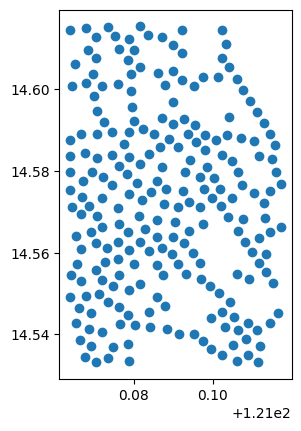

In [37]:
gdf.plot()

In [13]:
len(pasig_gdf)

354

<AxesSubplot: >

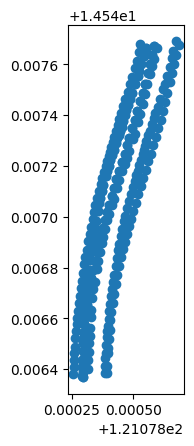

In [14]:
pasig_gdf.plot()

<AxesSubplot: >

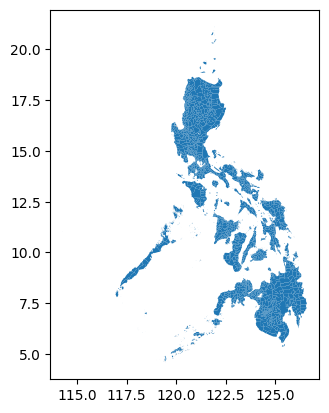

In [15]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')
philippines.plot()

<AxesSubplot: >

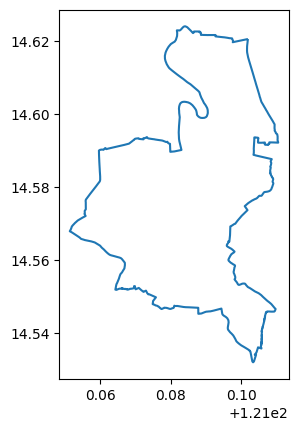

In [16]:
result = philippines[philippines['ADM3_EN'] == 'City of Pasig']
result.boundary.plot()

In [17]:
first = pasig_gdf.head(1)
first

,id,is_pano,thumb_2048_url,geometry
0,3159429050961771,False,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,POINT (121.07829 14.54644)


<AxesSubplot: >

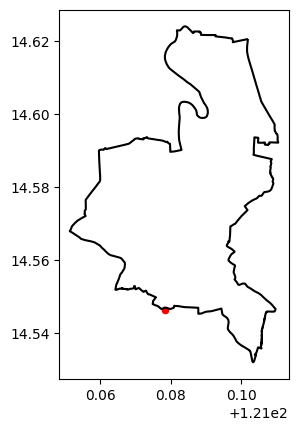

In [18]:
base = result.boundary.plot(edgecolor='black')
first.plot(ax=base, markersize=20, color='red')

In [19]:
clipped = gpd.clip(pasig_gdf, result)
clipped.shape

(200, 4)

<AxesSubplot: >

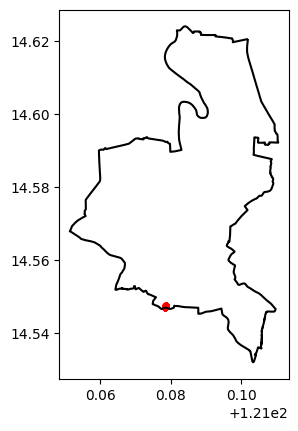

In [20]:
base = result.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=10, color='red')

<AxesSubplot: >

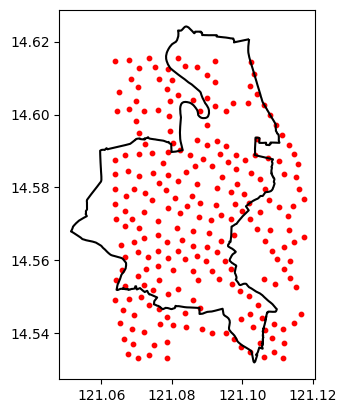

In [38]:
base = result.boundary.plot(edgecolor='black')
gdf.plot(ax=base, markersize=10, color='red')